### Trabalho final - Disciplina "Big Data e tecnologias de armazenamento"

###Alunos:

- Benício Bezerra de Abreu Carneiro
- Marcos Andre Pires da Silva Junior
- Felipe Alves da Silva
- Gabriel Façanha Leal
_________________________________________________

Assunto: Dados de cotação do dólar

Tipo de Banco: Document (MongoDB)

In [ ]:
!pip install pymongo==3.10.0
!pip install requests
!pip install pandas


In [ ]:
!wget https://fastdl.mongodb.org/linux/mongodb-linux-x86_64-3.0.15.tgz
!tar xfv /content/mongodb-linux-x86_64-3.0.15.tgz

!mkdir /data
!mkdir /data/db

!nohup sudo /content/mongodb-linux-x86_64-3.0.15/bin/mongod --nojournal --dbpath /data/db >log1 &

!cat log1

--2024-06-22 04:20:07--  https://fastdl.mongodb.org/linux/mongodb-linux-x86_64-3.0.15.tgz
Resolving fastdl.mongodb.org (fastdl.mongodb.org)... 13.226.210.71, 13.226.210.112, 13.226.210.84, ...
Connecting to fastdl.mongodb.org (fastdl.mongodb.org)|13.226.210.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63276568 (60M) [application/x-gzip]
Saving to: ‘mongodb-linux-x86_64-3.0.15.tgz.1’

mongodb-linux-x86_6 100%[===================>]  60.34M  24.4MB/s    in 2.5s    

2024-06-22 04:20:10 (24.4 MB/s) - ‘mongodb-linux-x86_64-3.0.15.tgz.1’ saved [63276568/63276568]

mongodb-linux-x86_64-3.0.15/README
mongodb-linux-x86_64-3.0.15/THIRD-PARTY-NOTICES
mongodb-linux-x86_64-3.0.15/GNU-AGPL-3.0
mongodb-linux-x86_64-3.0.15/bin/mongodump
mongodb-linux-x86_64-3.0.15/bin/mongorestore
mongodb-linux-x86_64-3.0.15/bin/mongoexport
mongodb-linux-x86_64-3.0.15/bin/mongoimport
mongodb-linux-x86_64-3.0.15/bin/mongostat
mongodb-linux-x86_64-3.0.15/bin/mongotop
mongodb-linux-x86_64-

In [ ]:
import pymongo
import requests
import pandas as pd
import json
from pandas import json_normalize
from pymongo import MongoClient

In [ ]:
client = MongoClient('127.0.0.1', 27017)

resposta = requests.get("https://economia.awesomeapi.com.br/json/daily/USD-BRL/30").text

response = json.loads(resposta)
response = response[1:len(response)]
response


[{'high': '5.4623',
  'low': '5.4232',
  'varBid': '-0.0157',
  'pctChange': '-0.29',
  'bid': '5.4321',
  'ask': '5.4331',
  'timestamp': '1719003551'},
 {'high': '5.4586',
  'low': '5.4486',
  'varBid': '0.0059',
  'pctChange': '0.11',
  'bid': '5.4537',
  'ask': '5.4547',
  'timestamp': '1718919337'},
 {'high': '5.437',
  'low': '5.4242',
  'varBid': '-0.0093',
  'pctChange': '-0.17',
  'bid': '5.4269',
  'ask': '5.427',
  'timestamp': '1718832272'},
 {'high': '5.4427',
  'low': '5.4349',
  'varBid': '0.0046',
  'pctChange': '0.08',
  'bid': '5.44',
  'ask': '5.441',
  'timestamp': '1718746145'},
 {'high': '5.4259',
  'low': '5.4194',
  'varBid': '0.0054',
  'pctChange': '0.1',
  'bid': '5.4245',
  'ask': '5.4253',
  'timestamp': '1718659777'},
 {'high': '5.3871',
  'low': '5.3439',
  'varBid': '0.0006',
  'pctChange': '0.01',
  'bid': '5.3757',
  'ask': '5.3769',
  'timestamp': '1718571600'},
 {'high': '5.3871',
  'low': '5.3439',
  'varBid': '0.0126',
  'pctChange': '0.23',
  'bid

In [ ]:
with client:

    db = client.testdb

    db.inventory.insert_many(response)
    print("Dados inseridos com sucesso!")

Dados inseridos com sucesso!


In [ ]:
cursor = db.inventory.find({})
for record in cursor:
  print(record)

{'_id': ObjectId('66763eb11bb52dc4ce28b271'), 'high': '5.4623', 'low': '5.4232', 'varBid': '-0.0157', 'pctChange': '-0.29', 'bid': '5.4321', 'ask': '5.4331', 'timestamp': '1719003551'}
{'_id': ObjectId('66763eb11bb52dc4ce28b272'), 'high': '5.4586', 'low': '5.4486', 'varBid': '0.0059', 'pctChange': '0.11', 'bid': '5.4537', 'ask': '5.4547', 'timestamp': '1718919337'}
{'_id': ObjectId('66763eb11bb52dc4ce28b273'), 'high': '5.437', 'low': '5.4242', 'varBid': '-0.0093', 'pctChange': '-0.17', 'bid': '5.4269', 'ask': '5.427', 'timestamp': '1718832272'}
{'_id': ObjectId('66763eb11bb52dc4ce28b274'), 'high': '5.4427', 'low': '5.4349', 'varBid': '0.0046', 'pctChange': '0.08', 'bid': '5.44', 'ask': '5.441', 'timestamp': '1718746145'}
{'_id': ObjectId('66763eb11bb52dc4ce28b275'), 'high': '5.4259', 'low': '5.4194', 'varBid': '0.0054', 'pctChange': '0.1', 'bid': '5.4245', 'ask': '5.4253', 'timestamp': '1718659777'}
{'_id': ObjectId('66763eb11bb52dc4ce28b276'), 'high': '5.3871', 'low': '5.3439', 'varBi

In [ ]:
df = pd.DataFrame(list(db.inventory.find()))

In [ ]:
df.dtypes

_id          object
high         object
low          object
varBid       object
pctChange    object
bid          object
ask          object
timestamp    object
dtype: object

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit="s")

<ipython-input-92-e420b1853a90>:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit="s")


In [ ]:
type_dict = { 'high':'float',
              'low':'float',
              'varBid':'float',
              'pctChange':'float',
              'bid':'float',
              'ask':'float'}

In [ ]:
df = df.astype(type_dict)

In [ ]:
df.describe()

,high,low,varBid,pctChange,bid,ask,timestamp
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88
mean,5.310427,5.280715,0.011916,0.227159,5.303895,5.304931,2024-06-07 13:09:52
min,5.145100,5.130400,-0.015700,-0.290000,5.144200,5.145000,2024-05-23 23:57:52
25%,5.235375,5.193600,0.000675,0.010000,5.234075,5.235400,2024-05-31 14:41:04
50%,5.348300,5.255000,0.004500,0.080000,5.343600,5.344600,2024-06-07 20:58:40
75%,5.387100,5.360100,0.012600,0.230000,5.375700,5.376900,2024-06-14 20:58:40
max,5.462300,5.448600,0.088800,1.690000,5.453700,5.454700,2024-06-21 20:58:40
std,0.098868,0.102036,0.024223,0.461728,0.097498,0.097531,NaN


In [ ]:
df

,_id,high,low,varBid,pctChange,bid,ask,timestamp
0,66763eb11bb52dc4ce28b271,5.4623,5.4232,-0.0157,-0.29,5.4321,5.4331,2024-06-21 20:58:40
1,66763eb11bb52dc4ce28b272,5.4586,5.4486,0.0059,0.11,5.4537,5.4547,2024-06-20 21:34:56
2,66763eb11bb52dc4ce28b273,5.4370,5.4242,-0.0093,-0.17,5.4269,5.4270,2024-06-19 21:24:16
3,66763eb11bb52dc4ce28b274,5.4427,5.4349,0.0046,0.08,5.4400,5.4410,2024-06-18 21:28:32
4,66763eb11bb52dc4ce28b275,5.4259,5.4194,0.0054,0.10,5.4245,5.4253,2024-06-17 21:30:40
...,...,...,...,...,...,...,...,...
83,667651311bb52dc4ce28b2c8,5.1684,5.1603,0.0022,0.04,5.1628,5.1638,2024-05-28 22:11:12
84,667651311bb52dc4ce28b2c9,5.1730,5.1705,0.0014,0.03,5.1718,5.1726,2024-05-27 21:28:32
85,667651311bb52dc4ce28b2ca,5.1764,5.1304,0.0053,0.10,5.1707,5.1719,2024-05-26 19:05:36
86,667651311bb52dc4ce28b2cb,5.1764,5.1304,0.0207,0.40,5.1645,5.1652,2024-05-24 21:00:48


In [ ]:
import seaborn as sns

In [ ]:
sns.set_style("darkgrid")

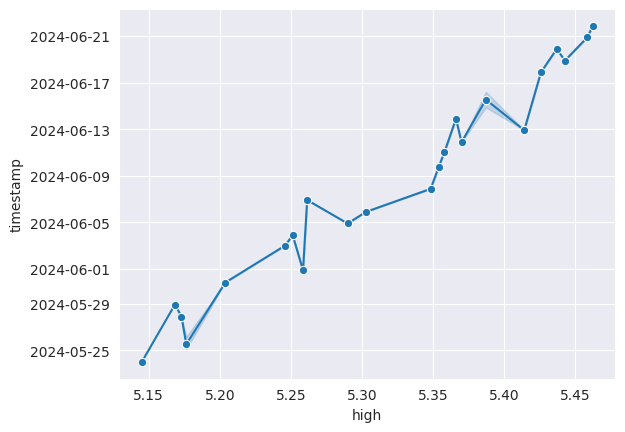

In [ ]:
ay = sns.lineplot(data=df, x="high", y="timestamp",marker="o")

<Axes: xlabel='low', ylabel='timestamp'>

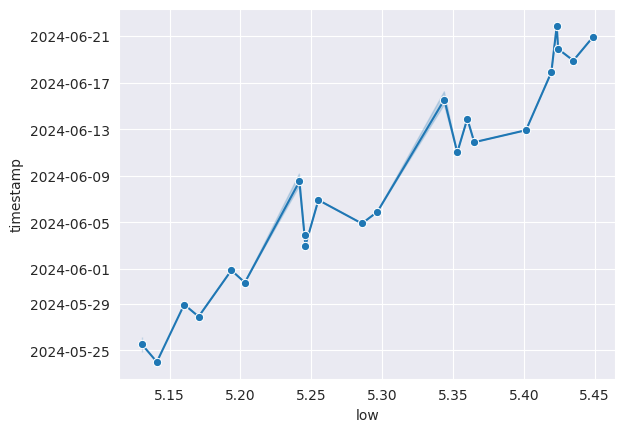

In [ ]:
sns.lineplot(data=df, x="low", y="timestamp",marker="o")